<a href="https://colab.research.google.com/github/wandieinnocents/-Tweets-Sentiment-Analysis/blob/main/v3_A_MULTIMODAL_ML_FRAMEWORK_FOR_BUSINESS_PERFORMANCE_ANALYSIS_Research_progress_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BUSINESS  PERFORMANCE ANALYSIS

In this research, I utilize The Supermart Grocery Sales - Retail Analytics Dataset  to evaluate and respond to business queries regarding sales data for a duration of 3 years of operation. The dataset contains data on orders placed by customers using a grocery delivery application in the state of Tamil Nadu, India.

The dataset is a useful resource also for understanding consumer behavior in the grocery retail industry, and for developing insights into the factors that drive sales in this sector. By analyzing the dataset, businesses can be able to  identify patterns, trends, and correlations that can help retailers optimize their marketing, pricing, and product strategies to increase sales and revenue and also to knkow which region to focus on most.

##TABLE OF CONTENTS

1.   Y:Data loading
2.   Y:Cleaning null values
3.   Y:What Product Category sold the most for all the 3 years?
4.   Y:What Product Sub Category sold the most for all the 3 years?
5.   Y:Which city had the highest number of sales
6.   Total number of sales to per customer
7.   Total number of sales by region
8.   Total profits per city
9.   Total profits per region
10.   Total sales per state
11.   Total profits per state
12.   Total  number of sales per year
13.   Total  number of profits per year




In [64]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os


In [65]:

# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [66]:
# read the dataset for supermarket sales
df = pd.read_csv("/content/drive/MyDrive/research1/supermarket_grocery_sales.csv")

In [67]:
# display the dataset
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


CHECKING AND CLEANING OF NULL VALUES

In [68]:
# Checking for null values using isnull()
print(df.isnull())

      Order ID  Customer Name  Category  Sub Category   City  Order Date  \
0        False          False     False         False  False       False   
1        False          False     False         False  False       False   
2        False          False     False         False  False       False   
3        False          False     False         False  False       False   
4        False          False     False         False  False       False   
...        ...            ...       ...           ...    ...         ...   
9989     False          False     False         False  False       False   
9990     False          False     False         False  False       False   
9991     False          False     False         False  False       False   
9992     False          False     False         False  False       False   
9993     False          False     False         False  False       False   

      Region  Sales  Discount  Profit  State  
0      False  False     False   False  F

In [69]:
# count the number of null values if exists
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [70]:
# remove all the null values from dataset if exists
df=df.dropna(how='all')

CLEANED DATASET

In [71]:
# cleaned dataset
df.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


#What Product Category sold the most for all the 3 years?


In [72]:
product_category = df.groupby('Category')

# product - category, quantiy orderd : sales
#Visualizing
product_category_sales = product_category.sum()['Sales']
product_category_sales

<ipython-input-72-1dea33b07a57>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_category_sales = product_category.sum()['Sales']


Category
Bakery               2112281
Beverages            2085313
Eggs, Meat & Fish    2267401
Food Grains          2115272
Fruits & Veggies     2100727
Oil & Masala         2038442
Snacks               2237546
Name: Sales, dtype: int64

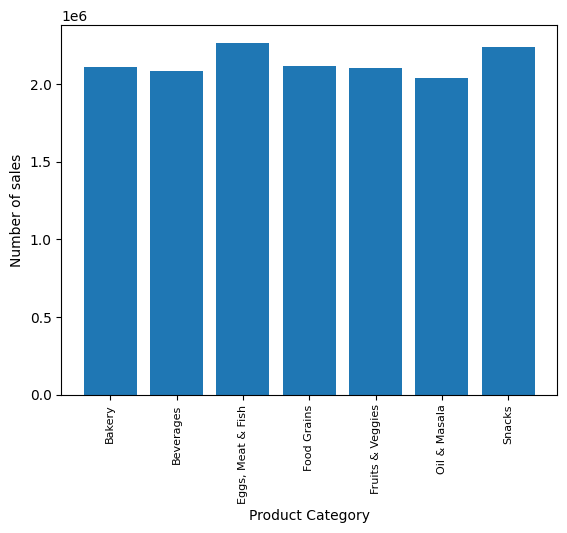

In [73]:
# vizualizing the dataset for product sales
products = [product for product, df in product_category]

plt.bar(products, product_category_sales)
plt.ylabel('Number of sales')
plt.xlabel('Product Category')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

#What Product Sub category Category sold the most for all the 3 years?


In [74]:
# product sub category which sold most for all 3 years
product_sub_category = df.groupby('Sub Category')
product_sub_category_sales = product_sub_category.sum()['Sales']
product_sub_category_sales

<ipython-input-74-996f854eb551>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_sub_category_sales = product_sub_category.sum()['Sales']


Sub Category
Atta & Flour           534649
Biscuits               684083
Breads & Buns          742586
Cakes                  685612
Chicken                520497
Chocolates             733898
Cookies                768213
Dals & Pulses          523371
Edible Oil & Ghee      668086
Eggs                   575156
Fish                   560548
Fresh Fruits           551212
Fresh Vegetables       525842
Health Drinks         1051439
Masalas                697480
Mutton                 611200
Noodles                735435
Organic Fruits         503402
Organic Staples        558929
Organic Vegetables     520271
Rice                   498323
Soft Drinks           1033874
Spices                 672876
Name: Sales, dtype: int64

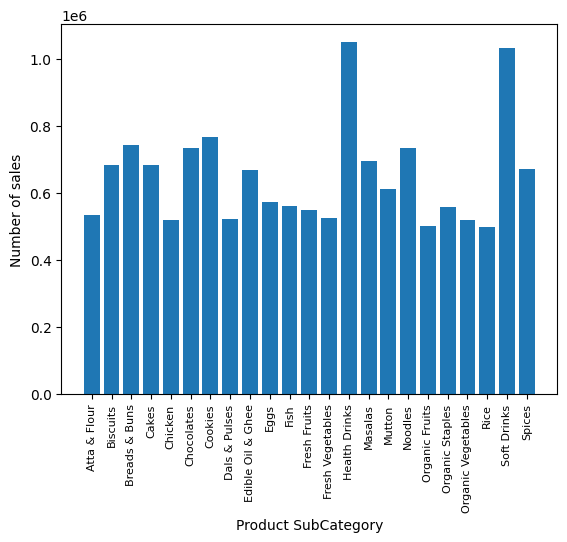

In [75]:
# vizualizing the product sub category sales

products_subcat = [product for product, df in product_sub_category]

# bar plot
plt.bar(products_subcat, product_sub_category_sales)
plt.ylabel('Number of sales')
plt.xlabel('Product SubCategory')
plt.xticks(products_subcat, rotation='vertical', size=8)
plt.show()

#WHICH CITY HAD THE HIGHEST NUMBER OF SALES


In [76]:
# city sales analysis for all 3 years
city = df.groupby('City')
city_sales = city.sum()['Sales']
city_sales

<ipython-input-76-9973ec438147>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_sales = city.sum()['Sales']


City
Bodi              667177
Chennai           634963
Coimbatore        634748
Cumbum            626047
Dharmapuri        571553
Dindigul          575631
Kanyakumari       706764
Karur             642273
Krishnagiri       637273
Madurai           617836
Nagercoil         551435
Namakkal          598530
Ooty              599292
Perambalur        659738
Pudukottai        653179
Ramanadhapuram    634386
Salem             657093
Tenkasi           643652
Theni             579553
Tirunelveli       659812
Trichy            541403
Vellore           676550
Viluppuram        581274
Virudhunagar      606820
Name: Sales, dtype: int64

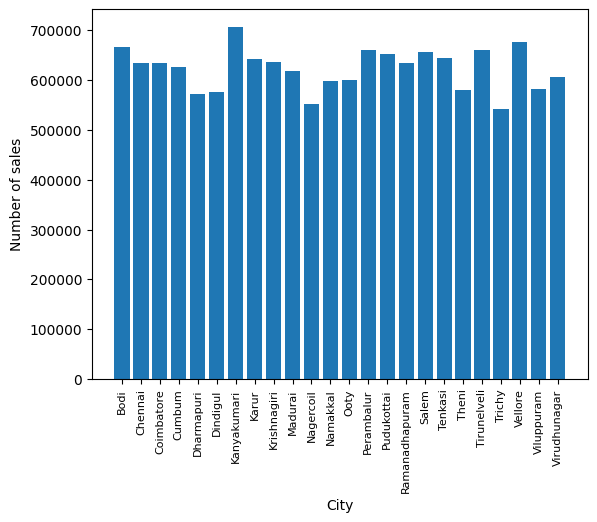

In [77]:
# vizualizing the city sales data for the 3 years

city_sales_analysis = [product for product, df in city]

# bar plot
plt.bar(city_sales_analysis, city_sales)
plt.ylabel('Number of sales')
plt.xlabel('City')
plt.xticks(city_sales_analysis, rotation='vertical', size=8)
plt.show()

##Total number of purchases / sales to per customer

In [78]:
# Total number of sales to per customer
customers = df.groupby('Customer Name')
customer_sales = customers.sum()['Sales']
customer_sales


<ipython-input-78-396f14434c49>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_sales = customers.sum()['Sales']


Customer Name
Adavan      315341
Aditi       299674
Akash       307488
Alan        294397
Amrish      333351
Amy         301558
Anu         283735
Arutra      325720
Arvind      293802
Esther      283656
Ganesh      278349
Hafiz       251965
Harish      293839
Haseena     298924
Hussain     307337
Jackson     271793
James       305915
Jonas       293489
Komal       295671
Krithika    334361
Kumar       262623
Malik       290884
Mathew      308376
Muneer      311553
Peer        307026
Ram         295338
Ramesh      292087
Ravi        305591
Ridhesh     309639
Roshan      298463
Rumaiza     284534
Sabeela     288230
Shah        318588
Sharon      289486
Sheeba      308720
Shree       292566
Sudeep      309196
Sudha       273493
Sundar      287151
Suresh      315973
Surya       312645
Veena       299160
Verma       331665
Veronica    301611
Vidya       321798
Vince       284536
Vinne       319565
Willams     293597
Yadav       273162
Yusuf       299361
Name: Sales, dtype: int64

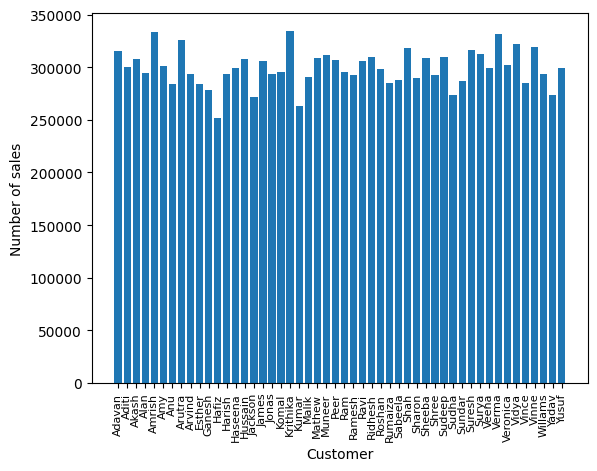

In [79]:
# vizualizing Total number of sales to per customer

customer_sales_analysis = [product for product, df in customers]

# bar plot
plt.bar(customer_sales_analysis, customer_sales)
plt.ylabel('Number of sales')
plt.xlabel('Customer')
plt.xticks(customer_sales_analysis, rotation='vertical', size=8)
# bar width
plt.show()

##Total number of sales by region

In [80]:
# sales analysis by region
regions = df.groupby('Region')
region_sales = regions.sum()['Sales']
region_sales


<ipython-input-80-7032e750793f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_sales = regions.sum()['Sales']


Region
Central    3468156
East       4248368
North         1254
South      2440461
West       4798743
Name: Sales, dtype: int64

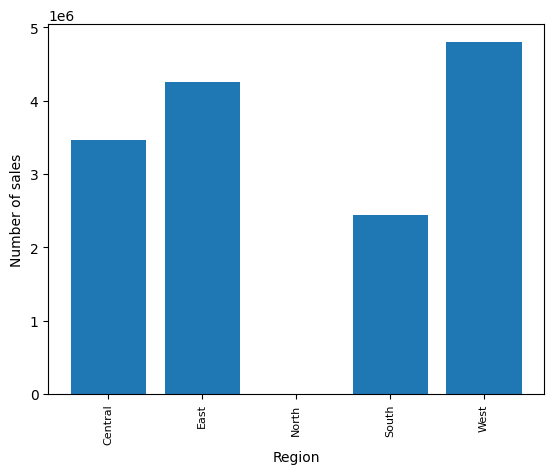

In [81]:
# vizualizing sales analysis by region

region_sales_analysis = [product for product, df in regions]

# bar plot
plt.bar(region_sales_analysis, region_sales)
plt.ylabel('Number of sales')
plt.xlabel('Region')
plt.xticks(region_sales_analysis, rotation='vertical', size=8)
# bar width
plt.show()